### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Answer:

a. The independent variable is whether the font name and color were similar or different. i.e congruent or incogruent.

b. The dependent variable is the time it takes to name the ink colors in equally-sized lists.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Answer : 

There are 24 samples using which we want to infer about the population. 
The hypothesis is that whether the font name and color matching will affect the reaction time. So, whether these 2 tests will result in similar mean response time or different mean response time will be the hypothesis. 

 Uc = mean response time for congruent population
 
 Ui = mean response time for incongruent population

- So, null hypothesis (h0) for the Stroop test would be "mean time taken to complete the task will be same for both congruent and incongruent tests".  


 ui = uc

- alternate hypothesis(ha) for the Stroop test would be "mean time taken to complete the task will be different for these two tests".

 ui != uc

As the sample size is less than 30 and we don't know the population variance, it would be appropriate to use the t test. The paired sample t-test has following main assumptions:
    - The dependent variable must be continuous (interval/ratio).
    - The observations are independent of one another.
    - The distribution of the mean difference is normal.

Hence, we will use paired t test for two samples.

References:

1. [influentialpoints](http://influentialpoints.com/Training/paired_t-test-principles-properties-assumptions.htm)
2. [statisticssolutions](https://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/)
3. [psychology.uiowa.edu](http://www2.psychology.uiowa.edu/faculty/mordkoff/GradStats/part%201/I.07%20normal.pdf)


In [16]:
## import the required modules here

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt
%matplotlib inline

In [9]:
# Perform the analysis here
dfstroop=pd.read_csv('stroopdata.csv',sep=',')
#print(dfstroop.describe())
c_mean=dfstroop.Congruent.mean()
ic_mean=dfstroop.Incongruent.mean()
c_stdev=dfstroop.Congruent.std()
ic_stdev=dfstroop.Incongruent.std()

print("mean of Conguent sample is {}".format(c_mean))
print("mean of Incongruent sample is {}".format(ic_mean))
print("standard deviation of Conguent sample is {}".format(c_stdev))
print("standard deviation of Incongruent sample is {}".format(ic_stdev))

mean of Conguent sample is 14.051125000000004
mean of Incongruent sample is 22.01591666666667
standard deviation of Conguent sample is 3.559357957645195
standard deviation of Incongruent sample is 4.797057122469138


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

Answer : 

The following 2 measures are being used. 

a. Mean- Measure of central tendency
- mean of Conguent sample is 14.051125000000004
- mean of Incongruent sample is 22.01591666666667

b. Standard deviaation -measure of variability

- standard deviation of Conguent sample is 3.559357957645195
- standard deviation of Incongruent sample is 4.797057122469138


(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

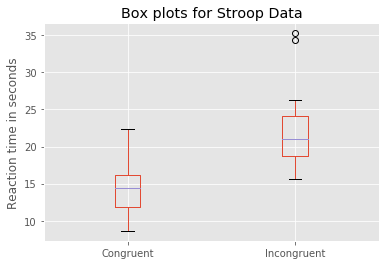

In [10]:
# Build the visualizations here
## box plot
plt.style.use('ggplot')
dfstroop.plot.box()
plt.ylabel('Reaction time in seconds')
plt.title('Box plots for Stroop Data')
plt.show();


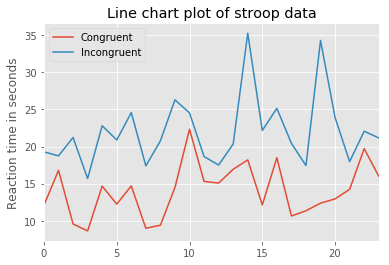

In [11]:
##  crea
dfstroop.plot.line()
#dfstroop.plot(kind='bar',)
plt.title("Line chart plot of stroop data")    
plt.ylabel('Reaction time in seconds')
plt.show()

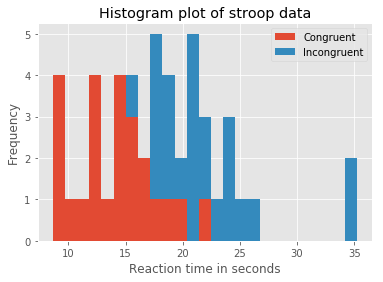

In [12]:
## 

##dfstroop.plot(x=None, y=None, kind='line', 
#ax=None, subplots=False, sharex=None, sharey=False,
#layout=None, figsize=None, use_index=True, title=None, grid=None,
#legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None,
#yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, 
dfstroop.plot.hist(stacked="false", bins = 25)
plt.title("Histogram plot of stroop data")    
plt.xlabel('Reaction time in seconds')
plt.ylabel('Frequency')
plt.show()

Answer :

1. Boxplot - It is obvious from the plot that the median for incongruent plot is more than median of congruent plot.
    Also, there are 2 extreme outliers in the box plot for incongruent sample. Both the plots are also skewed. 
    The congruent plot is skewed to the left and incongruent plot is skewed to the right.
    
2. Line plot - This plot is also showing that the reaction/response time is greater for incongruent samples vis a vis congruent sample. 

3. Histogram - The histogram shows the similar pattern which is evident from line plot and box plot. Aside,from this it is clear from the histogram that there are outlier at 35 seconds for incongruent sample. 

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [60]:
# Perform the statistical test here
#https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples
## Calculate the t statistic using scipy function.
c_sample=dfstroop.Congruent
ic_sample=dfstroop.Incongruent
t1,p1 = stats.ttest_rel(c_sample,ic_sample)
print("t statistic is {} and p value is {}".format(t1,p1))

# number of observations
n=24
# degree of freedom i.e number of samples - 1
df=n-1

## Let's have a confidence level of 99% 
# Calculate t-critical for alpha level 0.005
alpha = 0.025
tcritical = stats.t.ppf(alpha,df)
print("t critical statistic value is {} and {}".format(tcritical,-tcritical))

# Computes mean of the difference
mean_diff = c_sample.mean()-ic_sample.mean()
# Computes std deviation of the difference 
stdev_diff = (c_sample-ic_sample).std()
## compute standard error 
se = stdev_diff/float(sqrt(n))


## calculate the confidence interval
c1= mean_diff - tcritical*se
c2= mean_diff + tcritical*se

#stats.norm.interval(0.99, loc = mean_diff, scale = se)
print("confidence interval is {} and {}".format(c1,c2))


t statistic is -8.020706944109957 and p value is 4.103000585711178e-08
t critical statistic value is -2.068657610419041 and 2.068657610419041
confidence interval is -5.91055542396842 and -10.01902790936491


Answer :

The t-statistic of -8.02 is less than t critical statistic value of -2.807. Hence, we reject the null hypothesis that response time is similar for congruent and incongruent sample. 

The confidence level is 99%. 

P-value of 4.10e-08 indicates that there is a significantly low possibily that this outcome has happended by chance.

Yes, the results matched up with my expecatation. In fact, when I took the stroop test, the response time for congruent test was 11.5 seconds and incongruent test was 21 seconds. Also, the plots and analysis we did above also points to the similar conclusion.


In [ ]:
#Hypotheses regarding the reasons for the effect observed are presented. 
#An extension or related experiment to the performed Stroop task is provided, that may produce similar effects.

The Stroop effect is a phenomenon which can show how the brain processes words and colors differently. However, there are variations of stroop test. 

For instance, The emotional Stroop effect serves as an information processing approach to emotions. 
In an emotional Stroop task, an individual is given negative emotional words like "grief," "violence," and "pain"
mixed in with more neutral words like "clock," "door," and "shoe".[36] 
Just like in the original Stroop task, the words are colored and the individual is supposed to name the color. 
Research has revealed that individuals that are depressed are more likely to say the color of a negative word slower than the color of a neutral word.

https://en.wikipedia.org/wiki/Stroop_effect